In [ ]:
# Install required packages
!pip install gradio_client Pillow requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 2.9 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
from gradio_client import Client, handle_file
import requests
from PIL import Image
from IPython.display import display, Image as IPImage
import io
import base64
from google.colab import userdata

In [ ]:
# Function to load image from local path
def load_image_from_path(image_path):
    return Image.open(image_path)

In [ ]:
# Function for image understanding
def ask_about_image(image_path, question):
    client = Client("deepseek-ai/Janus-Pro-7B")
    result = client.predict(
        handle_file(image_path),  # Use handle_file for proper file processing
        question,
        api_name="/multimodal_understanding"
    )
    return result

In [ ]:
# Function for text-to-image generation
def generate_image(prompt):
    try:
        # Generate images
        result = client.predict(
            prompt,     # String prompt
            api_name="/generate_image"
        )

        # The result is a list of dictionaries containing image paths
        if isinstance(result, list):
            for item in result:
                if isinstance(item, dict) and 'image' in item:
                    # Download and display each image
                    image_path = item['image']
                    try:
                        img = Image.open(image_path)
                        display(img)
                    except Exception as e:
                        print(f"Could not open image: {str(e)}")
        return "Image generation complete"
    except Exception as e:
        return f"Error: {str(e)}"

In [ ]:
from google.colab import files
print("Please upload an image file:")
uploaded = files.upload()

Please upload an image file:


Saving animaltestimage.jpeg to animaltestimage.jpeg


In [ ]:
filename = list(uploaded.keys())[0]
image_from_upload = load_image_from_path(filename)
question = "Describe this image in detail"
print("\nImage Understanding from uploaded file:")
response = ask_about_image(filename, question)
print(f"Question: {question}")
print(f"Answer: {response}\n")


Image Understanding from uploaded file:
Loaded as API: https://deepseek-ai-janus-pro-7b.hf.space ✔
Question: Describe this image in detail
Answer: The image depicts a tiger walking towards the viewer. The tiger has a robust and muscular build, with a distinctive orange coat adorned with black stripes. The stripes are more pronounced on the tiger's legs and tail, while the body has a more uniform orange color. The tiger's face is characterized by a strong jawline, piercing eyes, and a white muzzle. The ears are rounded and stand upright, and the tail is long with a tuft of black at the end. The tiger's posture suggests it is in motion, with one front paw lifted as if taking a step forward. The background of the image is plain white, which helps to highlight the tiger's vibrant colors and details.



Text-to-Image Generation:
Prompt: High above the earth, nestled among soft, billowing clouds tinged with pink and gold, floats a serene village suspended in the sky. Delicate bridges made of crystal and moonlight connect quaint floating islands, each adorned with cottages that glimmer like dew-covered lanterns. The rooftops are thatched with shimmering feathers, and gentle breezes carry the faint sound of wind chimes and laughter. A waterfall flows upward from the center of the village, twisting through the air like a silver ribbon and disappearing into the heavens. Glowing jellyfish-like airships drift silently through the pastel sky, their translucent sails catching starlight as if weaving dreams. Above it all, a sapphire sun slowly sinks behind a halo of clouds, casting everything in an iridescent, enchanted glow—a place untouched by time, where serenity and imagination reign.


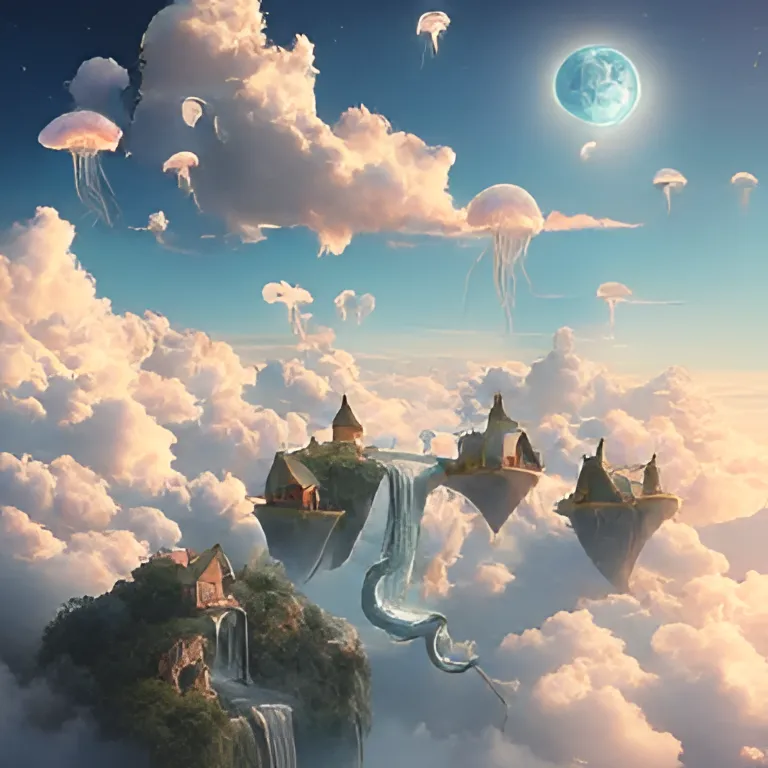

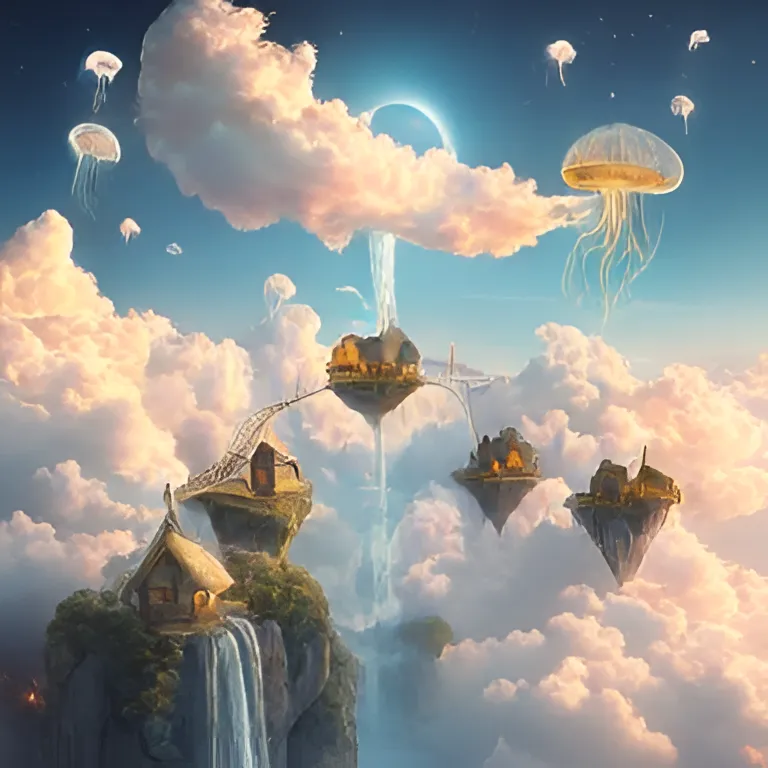

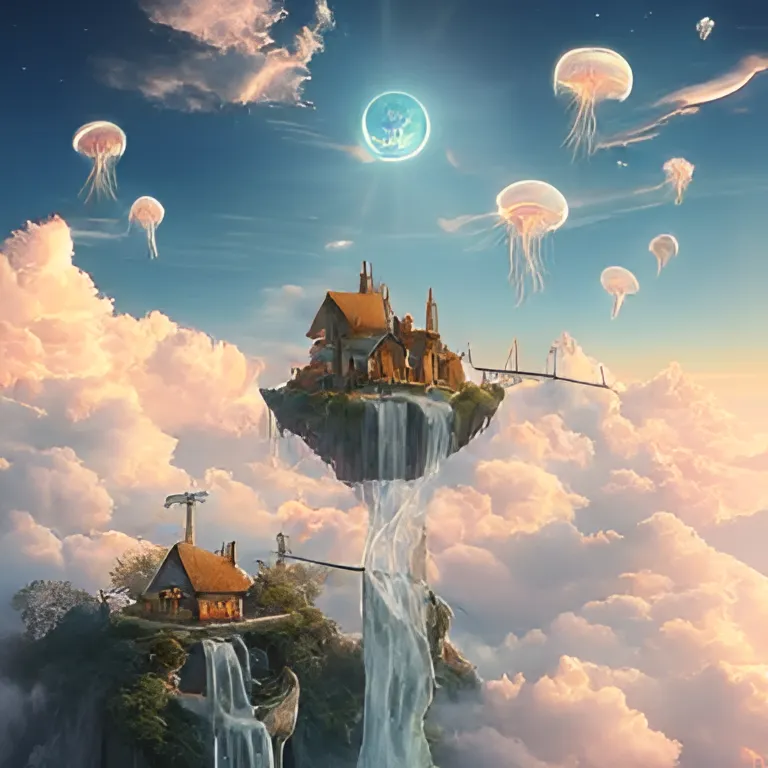

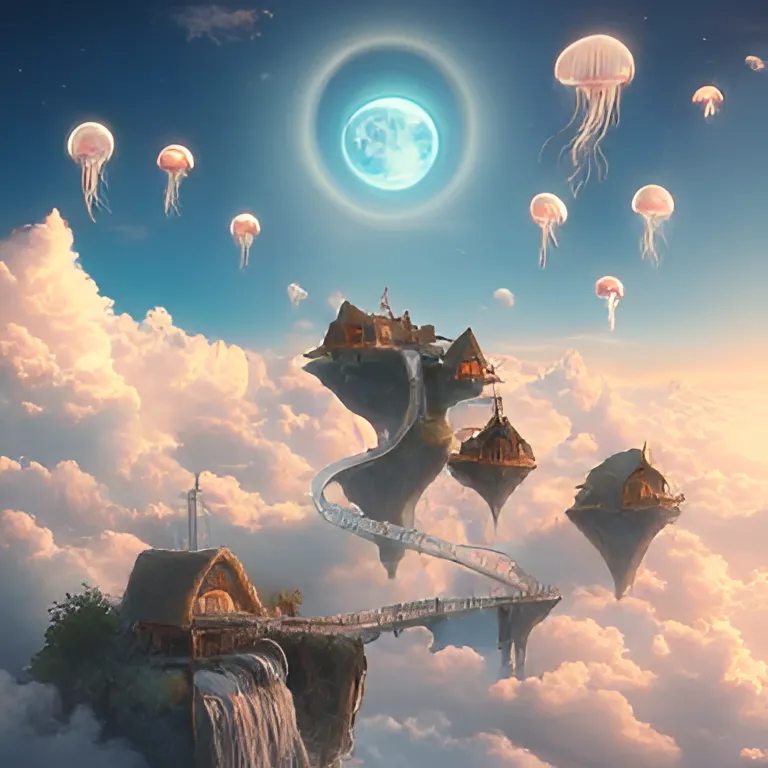

In [ ]:
prompt = "High above the earth, nestled among soft, billowing clouds tinged with pink and gold, floats a serene village suspended in the sky. Delicate bridges made of crystal and moonlight connect quaint floating islands, each adorned with cottages that glimmer like dew-covered lanterns. The rooftops are thatched with shimmering feathers, and gentle breezes carry the faint sound of wind chimes and laughter. A waterfall flows upward from the center of the village, twisting through the air like a silver ribbon and disappearing into the heavens. Glowing jellyfish-like airships drift silently through the pastel sky, their translucent sails catching starlight as if weaving dreams. Above it all, a sapphire sun slowly sinks behind a halo of clouds, casting everything in an iridescent, enchanted glow—a place untouched by time, where serenity and imagination reign."
print("Text-to-Image Generation:")
print(f"Prompt: {prompt}")
result = generate_image(prompt)